# Лабораторна робота 2.

## Створення штучно синтезованих наборів даних

**Лабораторна робота виконується індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Завдання 1: Синтезувати набір даних, який складається з двох лінійно роздільних множин, що можуть бути використані для навчання моделей класифікації.**


**Роз'яснення до завдання 1:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Обидва класи мають бути лінійно роздільні, тобто можна знайти таку пряму, яка розділяє дані двох класів без помилок.
   - Дані повинні бути рівномірно розподілені по всьому простору, але з певним відхиленням для забезпечення реалістичності.
   - Можливі варіанти синтезу:
     - Використання нормального розподілу для генерації точок навколо центроїдів двох класів.
     - Додавання невеликого шуму до кожного класу для забезпечення варіативності даних.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Перевірка лінійної роздільності: Побудуйте графік з нанесеними точками і покажіть лінію, яка розділяє два класи.

5. **Додаткові умови:**
- Зробіть аналіз набору даних, побудувавши гістограми розподілу даних для кожного класу окремо.
- Опишіть підходи, які використовувалися для створення набору даних.

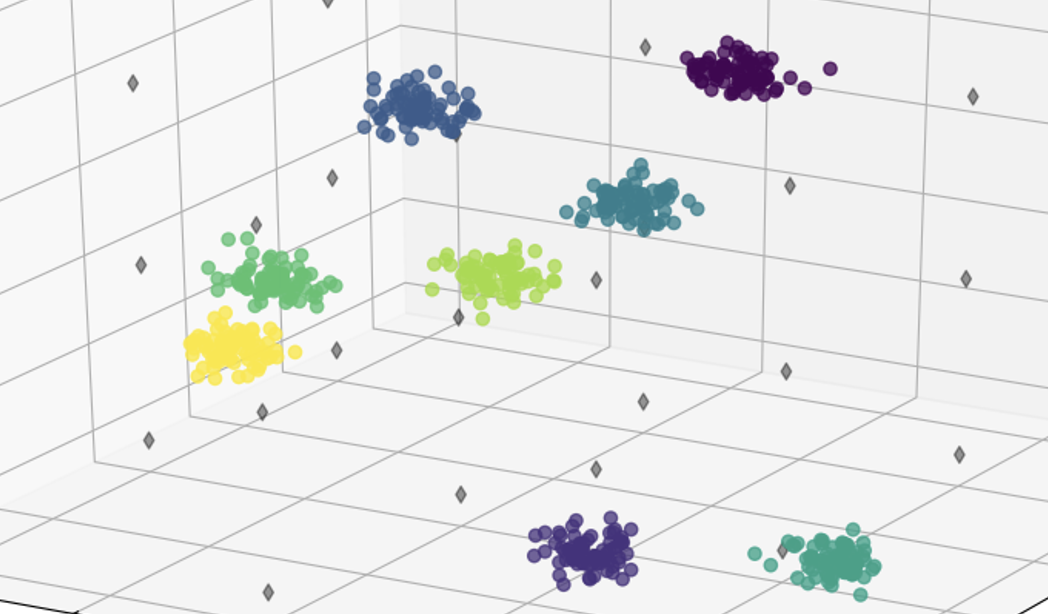

In [31]:

def generate_data(center, num_points, spread, class_name):
    x_point = np.linspace(center[0]-spread, center[1]+spread, num_points);
    y_point = center[1] + (np.random.rand(num_points) - 0.5) * spread

    
    x_point += np.random.randn(num_points) * spread
    y_point += np.random.randn(num_points) * spread

    label = np.full(num_points, class_name)
    data = np.column_stack((x_point, y_point))

    return data, label

    

In [32]:


center1 = [2, 2]        
center2 = [7, 7] 

num_points = 500   
spread = 1

data, label1= generate_data(center1, num_points, spread, 'class_1');
class_1 = pd.DataFrame(data, columns=['x', 'y'])
class_1['class'] = label1

data, label2= generate_data(center2, num_points, spread, 'class_2');
class_2 = pd.DataFrame(data, columns=['x', 'y'])
class_2['class'] = label2


df  = pd.concat([class_1, class_2], axis=0)
df.reset_index(drop=True, inplace=True)
df


,x,y,class
0,0.151230,2.493097,class_1
1,1.529410,1.706929,class_1
2,0.857349,1.068564,class_1
3,0.711615,1.539314,class_1
4,1.172254,1.409931,class_1
...,...,...,...
995,7.923005,6.800767,class_2
996,6.277479,7.583744,class_2
997,7.722195,5.330926,class_2
998,8.942289,5.591347,class_2


In [33]:
df.to_csv('task_1.csv', index=False)


In [34]:
df.dtypes

x        float64
y        float64
class     object
dtype: object

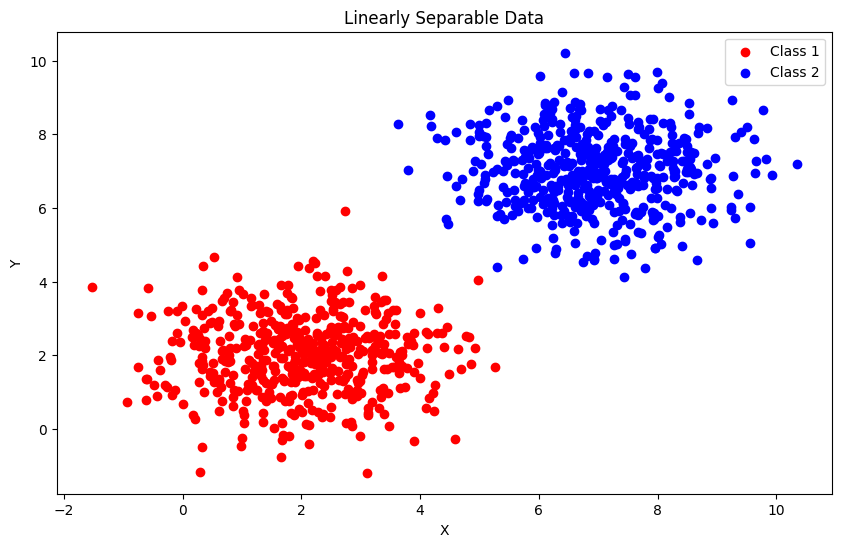

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(df[df["class"] == 'class_1']['x'], df[df["class"] == 'class_1']['y'], color='red', label='Class 1')

plt.scatter(df[df["class"] == 'class_2']['x'], df[df["class"] == 'class_2']['y'], color='blue', label='Class 2')


plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linearly Separable Data')
plt.legend()
plt.show()


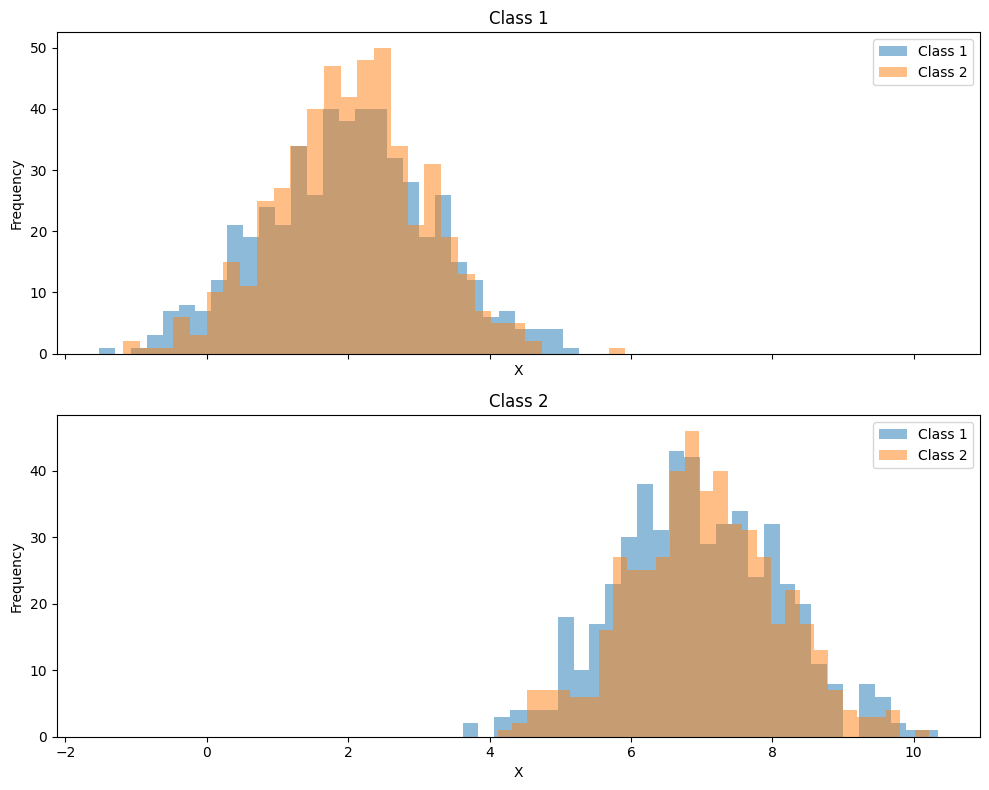

In [36]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

axs[0].hist(df[df['class'] == 'class_1']['x'], bins=30, alpha=0.5, label='Class 1')
axs[0].hist(df[df['class'] == 'class_1']['y'], bins=30, alpha=0.5, label='Class 2')
axs[0].set_title('Class 1')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Frequency')
axs[0].legend()


axs[1].hist(df[df['class'] == 'class_2']['x'], bins=30, alpha=0.5, label='Class 1')
axs[1].hist(df[df['class'] == 'class_2']['y'], bins=30,  alpha=0.5, label='Class 2')
axs[1].set_title('Class 2')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Frequency')
axs[1].legend()

plt.tight_layout()
plt.show()



Для створення набору даних, я написав функцію яка генерує дані для кожного класу. Функція приймає координати ценроїда, навколо якого будуть генеруватися точки, назву класа, кількість точок, та параметр розсіювання.
Далі я згенерував точки для x координати, які я рівномірно віддалені, для координати y я додав шуму, для того щоб точки були розсіяні.

**Завдання 2: Синтезувати набір даних, який складається з трьох множин (класів), що мають часткове перекриття, для використання в задачах класифікації та аналізу даних.**

**Роз'яснення до завдання 2:**

1. **Опис набору даних:**
   - Набір даних повинен містити три класифікаційні мітки (клас 1, клас 2, клас 3).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані мають утворювати три множини, кожна з яких розподілена навколо свого центру, але з перекриттям з іншими множинами.
   - Кожен клас повинен мати певну ступінь перекриття з іншими класами, що призводить до часткової змішуваності точок з різними мітками.
   - Можливі варіанти синтезу:
     - Використання нормального розподілу для генерації точок навколо центроїдів кожного класу.
     - Додавання більшого шуму або кореляції між точками для збільшення ступеня перекриття.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **300** для кожного класу (всього **900**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **900** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для всіх трьох класів, щоб візуалізувати перекриття множин.
   - Перевірте, чи дійсно дані утворюють перекриття між класами, показавши частку точок, які належать до зон перекриття.

5. **Додаткові умови:**
   - Побудуйте кореляційні графіки та гістограми розподілу для кожного класу.
   - Опишіть підходи, які використовувалися для створення набору даних, і обґрунтуйте вибір параметрів.

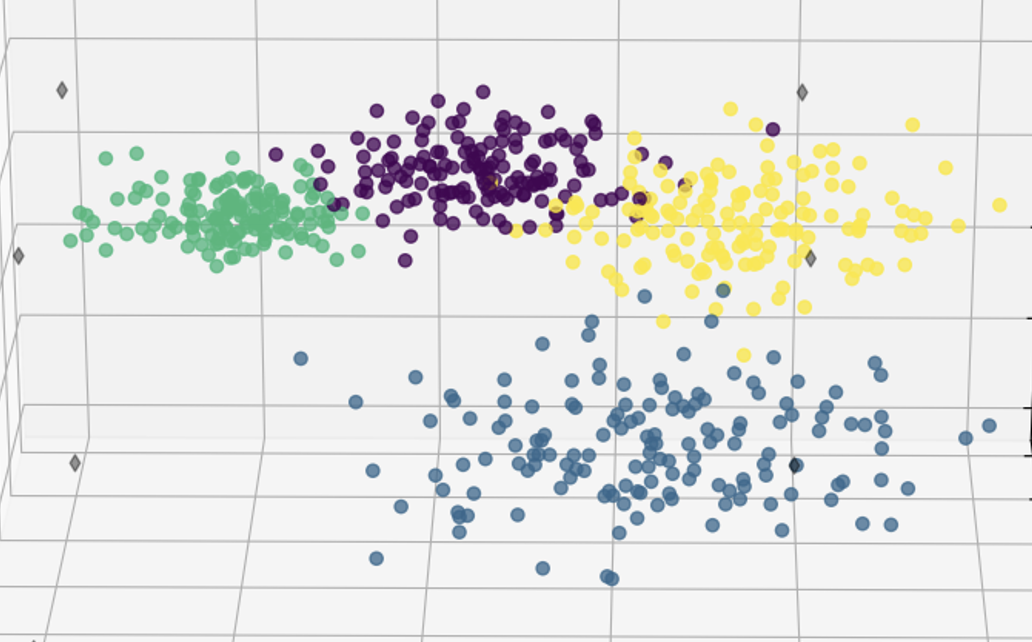

In [37]:

num_points = 300

center1 = [2,2]
center2=[5,5]
center3=[8,8]
spread = 1

data, label1= generate_data(center1, num_points, spread, 'class_1');
class_1 = pd.DataFrame(data, columns=['x', 'y'])
class_1['class'] = label1

data, label2= generate_data(center2, num_points, spread, 'class_2');
class_2 = pd.DataFrame(data, columns=['x', 'y'])
class_2['class'] = label2

data, label3= generate_data(center3, num_points, spread, 'class_3');
class_3 = pd.DataFrame(data, columns=['x', 'y'])
class_3['class'] = label3


df  = pd.concat([class_1, class_2, class_3], axis=0)
df.reset_index(drop=True, inplace=True)
df





,x,y,class
0,1.700021,0.923540,class_1
1,3.492780,0.699175,class_1
2,2.649919,2.951246,class_1
3,1.132112,-0.176247,class_1
4,1.409308,0.034527,class_1
...,...,...,...
895,8.906643,10.258761,class_3
896,6.529741,8.143704,class_3
897,9.826091,9.067903,class_3
898,7.147252,7.533308,class_3


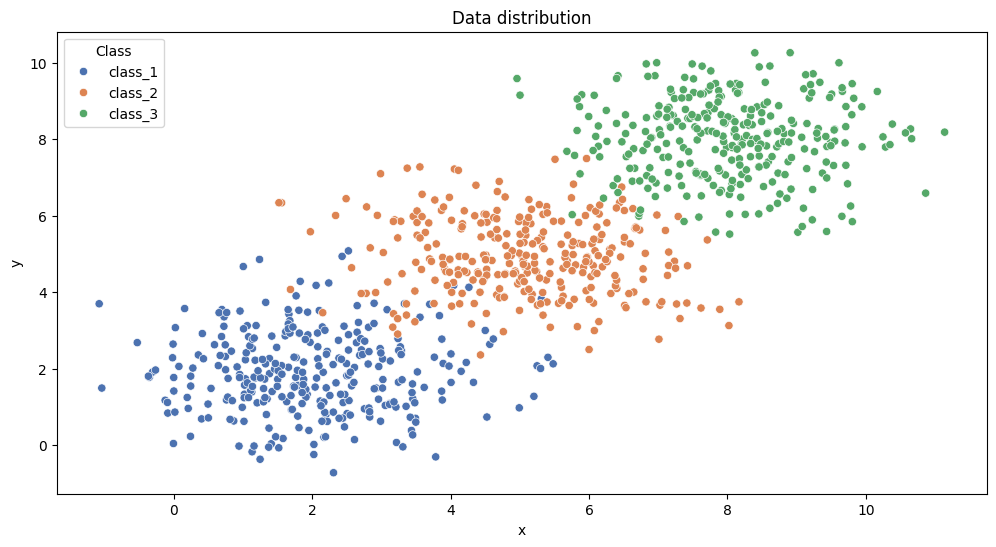

In [38]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='x', y='y', hue='class', data=df, palette='deep')
plt.title('Data distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(title='Class')
plt.show()


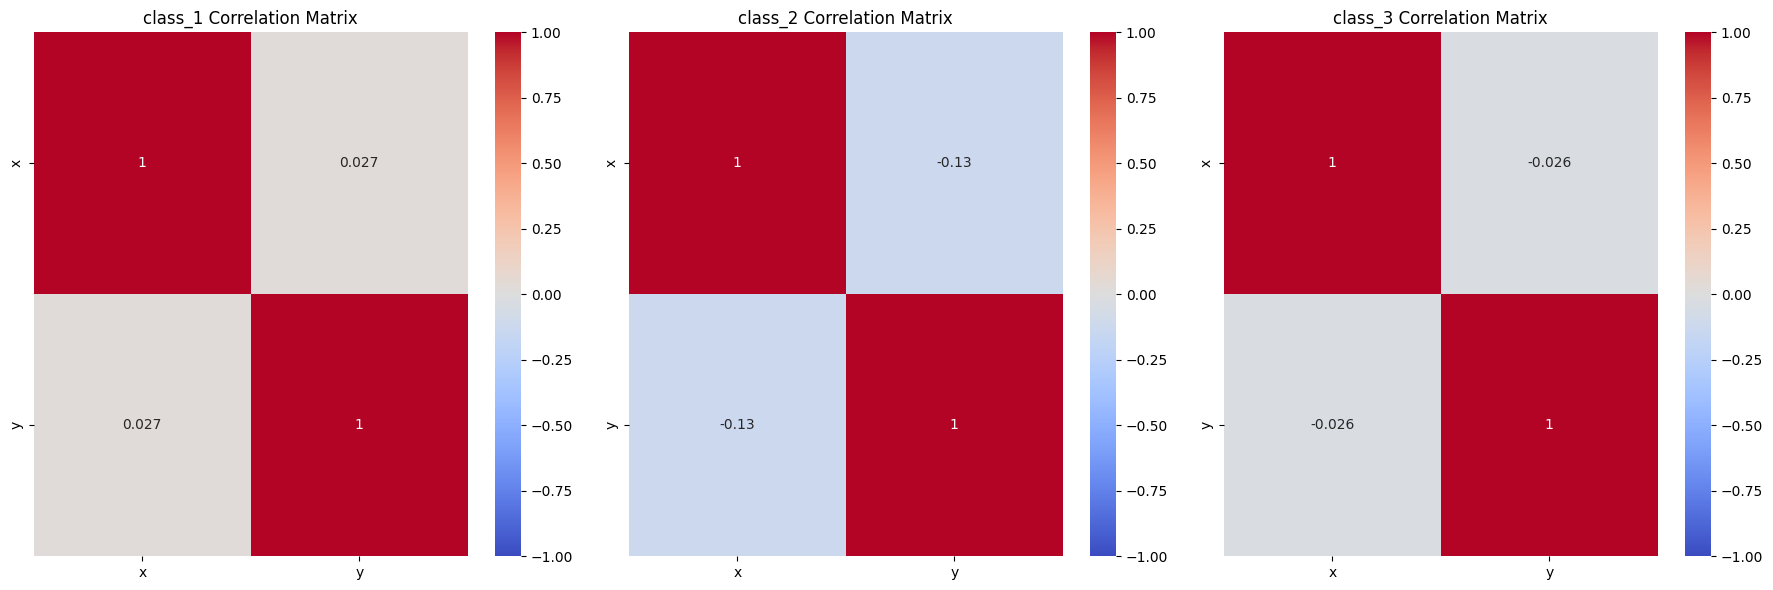

In [39]:

class_names = ["class_1", "class_2", "class_3"]
numbers = [0,1,2]

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, class_name in zip(numbers, class_names):
    corr_class = df[df["class"] == class_name][['x', 'y']].corr()
    sns.heatmap(corr_class, annot=True, cmap='coolwarm', ax=axs[i], vmin=-1, vmax=1)
    axs[i].set_title(f'{class_name} Correlation Matrix')

plt.tight_layout()
plt.show()






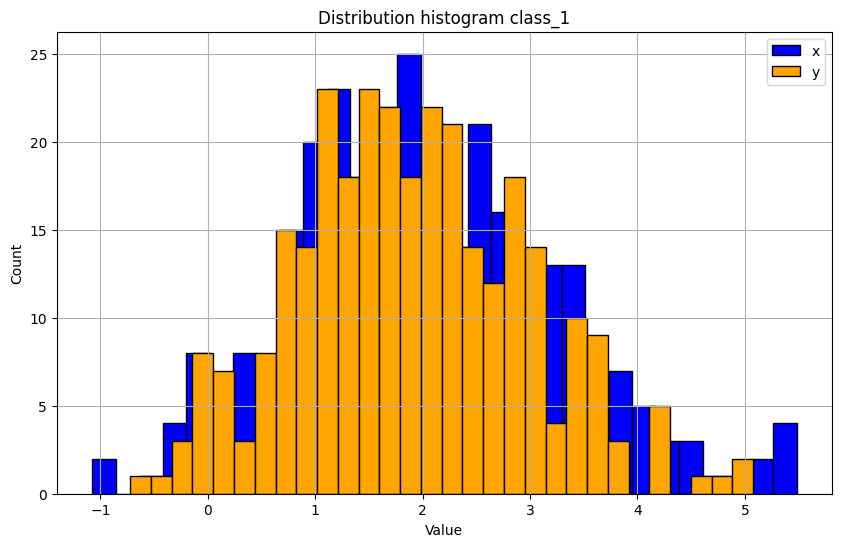

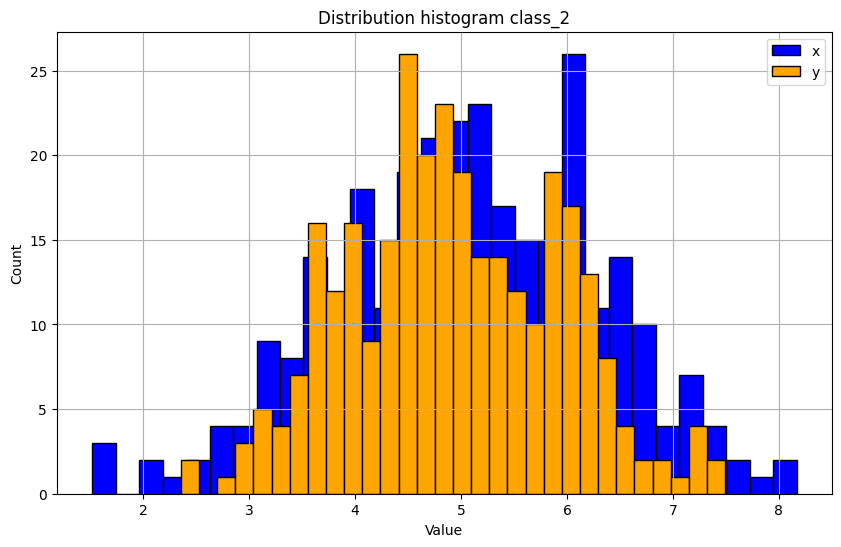

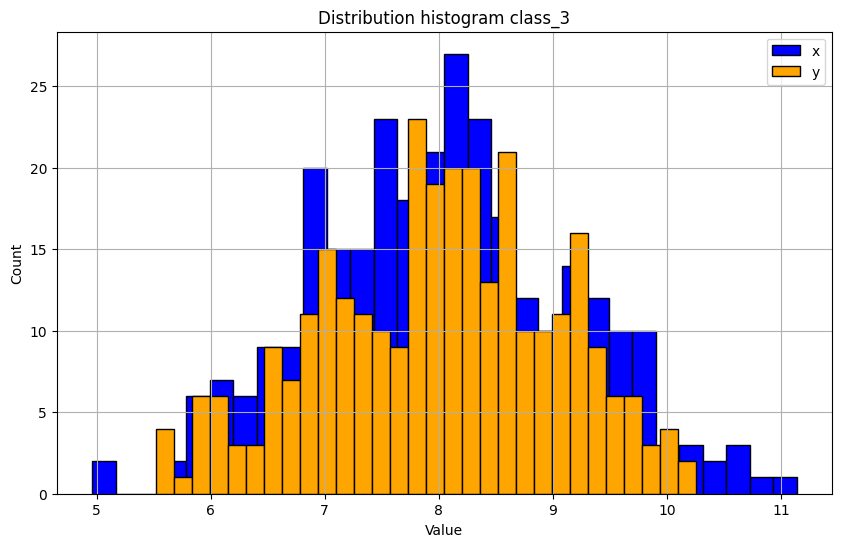

In [40]:
class_names = ["class_1", "class_2", "class_3"]

for class_name in class_names:
    plt.figure(figsize=(10, 6))
    
    sns.histplot(df[df['class'] == class_name]['x'], bins=30, color='blue', alpha=1, label='x', kde=False)
    sns.histplot(df[df['class'] == class_name]['y'], bins=30, color='orange', alpha=1, label='y', kde=False)
    
    plt.title(f'Distribution histogram {class_name}')
    plt.xlabel('Value')
    plt.ylabel('Count')
    plt.legend()
    plt.grid(True)
    plt.show()

Для генерацію троьх лінійно роздільних множин, я використав попередню функцію, яка генерує дані для кожного класу окремо. В якості центроїдів я обрав такі, щоб було часткове перекритя даних: [2,2] [5,5] [8,8]

**Завдання 3: Синтезувати набір даних, який складається з двох множин у формі "тор в торі", де одна множина має форму внутрішнього тора, а інша — зовнішнього тора.**

**Роз'яснення до завдання 3:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані повинні утворювати дві множини у формі тора: одна множина повинна бути розташована всередині іншої (тобто, "тор в торі").
   - Внутрішній тор (клас 1) повинен мати менший радіус і ширину, ніж зовнішній тор (клас 2).
   - Розподіл точок повинен бути рівномірним вздовж кожного тора з додаванням невеликого шуму для забезпечення варіативності.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y) $і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для обох класів, щоб візуалізувати форму "тор в торі".
   - Перевірте розподіл точок уздовж кожного тора, побудувавши радіальні гістограми для кожного класу.

5. **Додаткові умови:**
   - Побудуйте окремі графіки, які демонструють розподіл даних для кожного тора окремо.
   - Опишіть процес генерації даних та поясніть вибір параметрів для кожного тора.

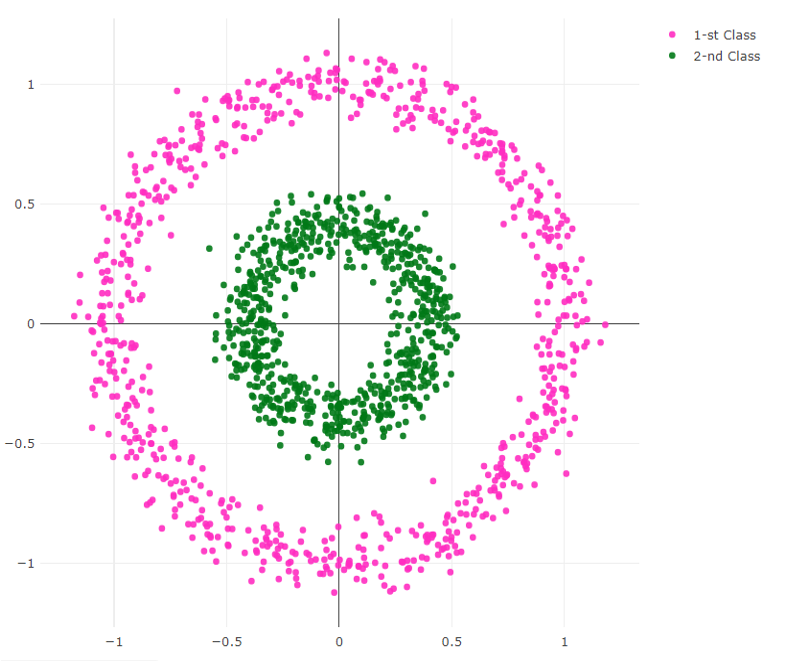

In [41]:

n_samples = 500
noise = 0.01

inner_radius = 0.5
inner_width = 0.1


angles_inner = np.random.uniform(0, 2*np.pi, n_samples)
r_inner = inner_radius + inner_width * np.random.uniform(-1, 1, n_samples)
x_inner = r_inner * np.cos(angles_inner) + noise * np.random.randn(n_samples)
y_inner = r_inner * np.sin(angles_inner) + noise * np.random.randn(n_samples)
class_inner = np.zeros(n_samples)

outer_radius = 1
outer_width = 0.1


angles_outer = np.random.uniform(0, 2*np.pi, n_samples)
r_outer = outer_radius + outer_width * np.random.uniform(-1, 1, n_samples)
x_outer = r_outer * np.cos(angles_outer) + noise * np.random.randn(n_samples)
y_outer = r_outer * np.sin(angles_outer) + noise * np.random.randn(n_samples)
class_outer = np.ones(n_samples)

x = np.concatenate([x_inner, x_outer])
y = np.concatenate([y_inner, y_outer])


labels = np.concatenate([class_inner, class_outer])

data = pd.DataFrame({'x': x, 'y': y, 'class': labels})

data.to_csv('torus_data.csv', index=False)




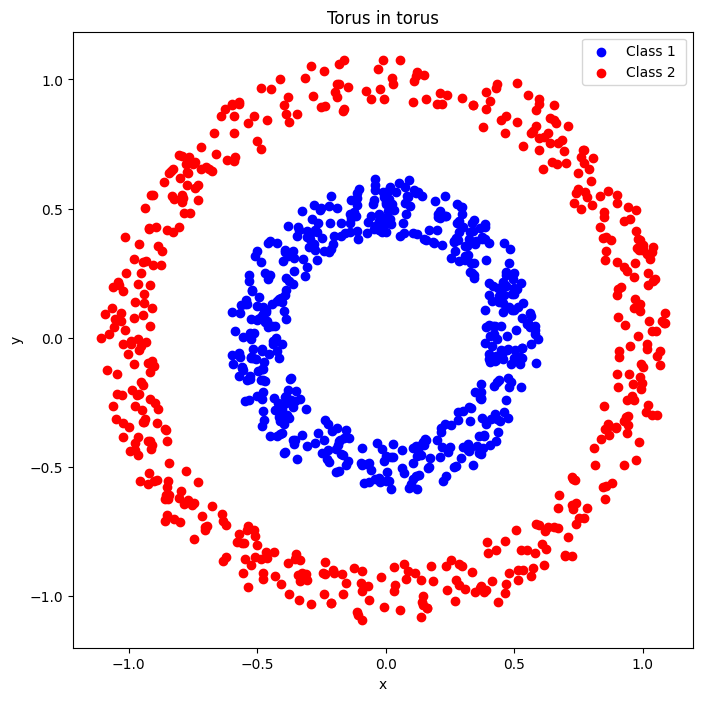

In [42]:
plt.figure(figsize=(8, 8))
plt.scatter(x_inner, y_inner, color='blue', label='Class 1 ')
plt.scatter(x_outer, y_outer, color='red', label='Class 2 ')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Torus in torus')
plt.legend()
plt.show()


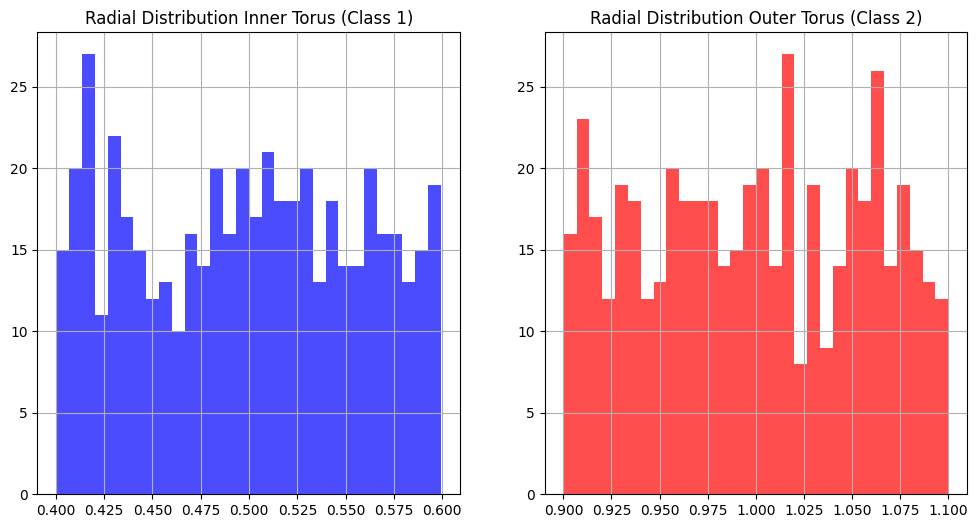

In [43]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(r_inner, bins=30, color='blue', alpha=0.7)
plt.title('Radial Distribution Inner Torus (Class 1)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(r_outer, bins=30, color='red', alpha=0.7)
plt.title('Radial Distribution Outer Torus (Class 2)')
plt.grid(True)

plt.show()

Для генерації тор в торі, я задав такі параметри:

n_samples = 500 - Кількість точок для кожного тора
 
noise = 0.01 - задає рівень шуму, що додається до координат точок, для того щоб точки були розміщені випадково.

inner_radius = 0.5 - радіус внутрішнього кола

inner_width = 0.1 -  Ширина внутрішнього тора бвона визначає відхилення від основного радіусу

outer_radius = 1 - радіус зовнішнього тора. 

outer_width = 0.1 -  Ширина зовнішнього тора, що визначає відхилення від основного радіусу.


Процес генерації даних для кожного тора:

1) angles_inner - генерує кути від 0 до 360
2) r_inner - генерує радіуси точок всередині тора
3) x_inner - обчислює координати x точок всередині тора + додає шум для створення випадкових відхилень.
4) y_inner - обчислює y-координати точок всередині тора + додає шум.

Процес генерації даних для другого тора аналогічний першому.

**Завдання 4: Синтезувати набір даних, який складається з двох множин, що утворюють подвійну спіраль, де одна спіраль огортає іншу.**

**Роз'яснення до завдання 4:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані повинні утворювати дві спіралі, закручені одна в іншу, так щоб кожна спіраль відповідала одному з класів.
   - Спіралі повинні мати протилежні напрямки закручування (одна за годинниковою стрілкою, інша — проти).
   - Кожна спіраль повинна бути рівномірно заповнена точками з невеликим додаванням шуму для варіативності даних.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для обох спіралей, щоб візуалізувати структуру "спіраль у спіралі".
   - Проаналізуйте відмінності у розподілі точок для обох класів та оцініть складність їх розділення.

5. **Додаткові умови:**
   - Створіть окремі графіки, що показують як закручується кожна спіраль.
   - Опишіть процес генерації даних, включаючи параметри, що використовувалися для визначення форми спіралей.

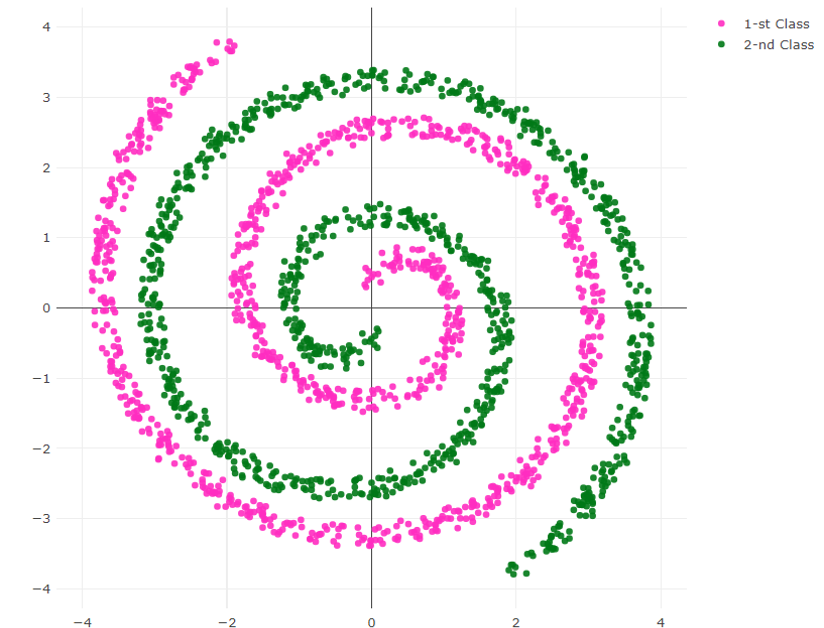

In [44]:

number_of_points = 500
noise = 0.05  
n_turns = 4

class_1 = np.linspace(0, n_turns * np.pi, number_of_points)
r_a = np.linspace(0, 4, number_of_points)
x_a = r_a * np.cos(class_1) + np.random.randn(number_of_points) * noise
y_a = r_a * np.sin(class_1) + np.random.randn(number_of_points) * noise
class_a = np.zeros(number_of_points)


class_2 = np.linspace(0, n_turns * np.pi, number_of_points)
r_b = np.linspace(0, 4, number_of_points)
x_b = r_b * np.cos(class_2 + np.pi) + np.random.randn(number_of_points) * noise
y_b = r_b * np.sin(class_2 + np.pi) + np.random.randn(number_of_points) * noise
class_b = np.ones(number_of_points)


x = np.concatenate((x_a, x_b))
y = np.concatenate((y_a, y_b))
labels = np.concatenate((class_a, class_b))

spiral_data = pd.DataFrame({"x": x, "y": y, "class": labels})




In [45]:
spiral_data.to_csv('task_4_spiral.csv', index=False)


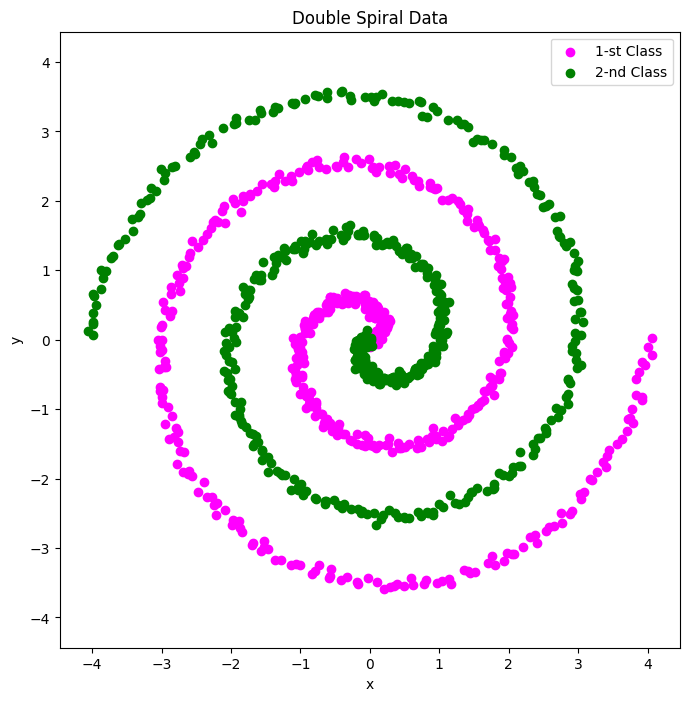

In [46]:
plt.figure(figsize=(8, 8))
plt.scatter(x_a, y_a, color='magenta', label='1-st Class')
plt.scatter(x_b, y_b, color='green', label='2-nd Class')
plt.legend()
plt.title('Double Spiral Data')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()


Для генерування даних для подвійної спіралі я задав такі параметри:
number_of_points = 500 - Кількість точок для кожного класу
noise = 0.05 - шум, який додається до кожної точки, щоб зробити дані варіативними

n_turns = 4 - кількість витків спіралі

class_1 -  визначає кутову позицію кожної точки спіралі розподілену від 0  n_turns * pi для першого класу.
r_a -  визначає радіус для кожної точки спіраліб що дозволяє спіралі розширюватися від центру до краю.

x_a і y_a -  координати x і y для кожної точки спіралі, які обрахуваються за допомогою функцій sin, cos від кутової позиції кожної точки + додавання шуму.



**Завдання 5: Синтезувати кілька наборів даних, що описують траєкторії системи Лоренца з різними параметрами, дослідити вплив параметрів на динаміку системи та візуалізувати результати.**


### 5.1: Теоретичне підґрунтя

**Опис системи Лоренца:**
Система Лоренца — це набір трьох нелінійних диференціальних рівнянь, що описують динаміку тривимірної системи з хаотичною поведінкою. Вона визначається такими рівняннями:

$$
\frac{dx}{dt} = \sigma (y - x)
$$

$$
\frac{dy}{dt} = x (\rho - z) - y
$$

$$
\frac{dz}{dt} = xy - \beta z
$$

Де:
- $(x, y, z)$ — змінні стану системи.
- $\sigma$ — параметр, що відповідає за швидкість зміни (часто називають "параметр Прандтля").
- $\rho$ — параметр, що відповідає за різницю температур у системі (відповідає за інтенсивність конвекції).
- $\beta$  — параметр, що відповідає за співвідношення розмірів.

**Роз'яснення до завдання:**
- Згенерувати дані для системи Лоренца за допомогою різних значень параметрів $\sigma$, $\rho$ та $\beta$.
- Проаналізувати вплив зміни параметрів на траєкторії системи.
- Візуалізувати результати в тривимірному просторі для кожного набору даних.

### 5.2: Генерація та візуалізація набору даних

**Що треба зробити:**

1. **Генерація даних:**
   - Вибрати декілька різних комбінацій параметрів $\sigma$, $\rho$ та $\beta$.
   - Використовуючи числовий метод (наприклад, метод Рунге-Кутти 4-го порядку), згенерувати траєкторії системи Лоренца для кожного набору параметрів.

2. **Візуалізація:**
   - Для кожного набору параметрів побудувати тривимірні графіки траєкторій.
   - Відобразити траєкторії в просторі $(x, y, z)$.

3. **Аналіз:**
   - Порівняти результати для різних наборів параметрів.
   - Описати, як зміна кожного з параметрів впливає на поведінку системи (наприклад, перехід від стабільного до хаотичного режиму).

**Очікуваний результат:**
- Кілька наборів даних, що описують траєкторії системи Лоренца з різними параметрами (мінімум 3).
- Візуалізації цих траєкторій у тривимірному просторі.
- Аналіз і опис впливу параметрів на динаміку системи.

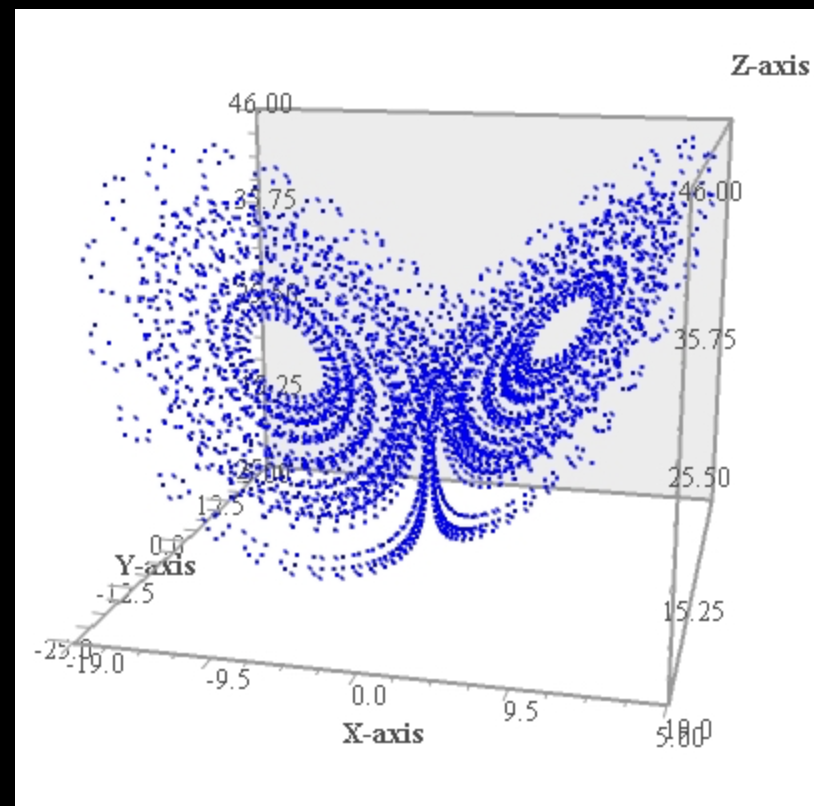

In [47]:

def lorenz_system(state, sigma, rho, beta):
    x, y, z = state
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    return np.array([dx_dt, dy_dt, dz_dt])

def runge_kutta_4(func, state, dt, sigma, rho, beta):
    k1 = dt * func(state, sigma, rho, beta)
    k2 = dt * func(state + k1 / 2, sigma, rho, beta)
    k3 = dt * func(state + k2 / 2, sigma, rho, beta)
    k4 = dt * func(state + k3, sigma, rho, beta)
    return state + (k1 + 2 * k2 + 2 * k3 + k4) / 6

number_of_steps = 10000

dt = 0.01

initial_state = np.array([1.0, 1.0, 1.0]) 

parameters = [
    {"sigma": 10.0, "rho": 28.0, "beta": 8.0 / 3.0},
    {"sigma": 14.0, "rho": 46.92, "beta": 4.0},
    {"sigma": 16.0, "rho": 45.92, "beta": 4.0}
]

trajectories = []

for params in parameters:
    sigma = params["sigma"]
    rho = params["rho"]
    beta = params["beta"]

    state = initial_state.copy()
    trajectory = np.zeros((number_of_steps, 3))
    
    for i in range(number_of_steps):
        trajectory[i] = state
        state = runge_kutta_4(lorenz_system, state, dt, sigma, rho, beta)
    
    trajectories.append({"params": params, "trajectory": trajectory})






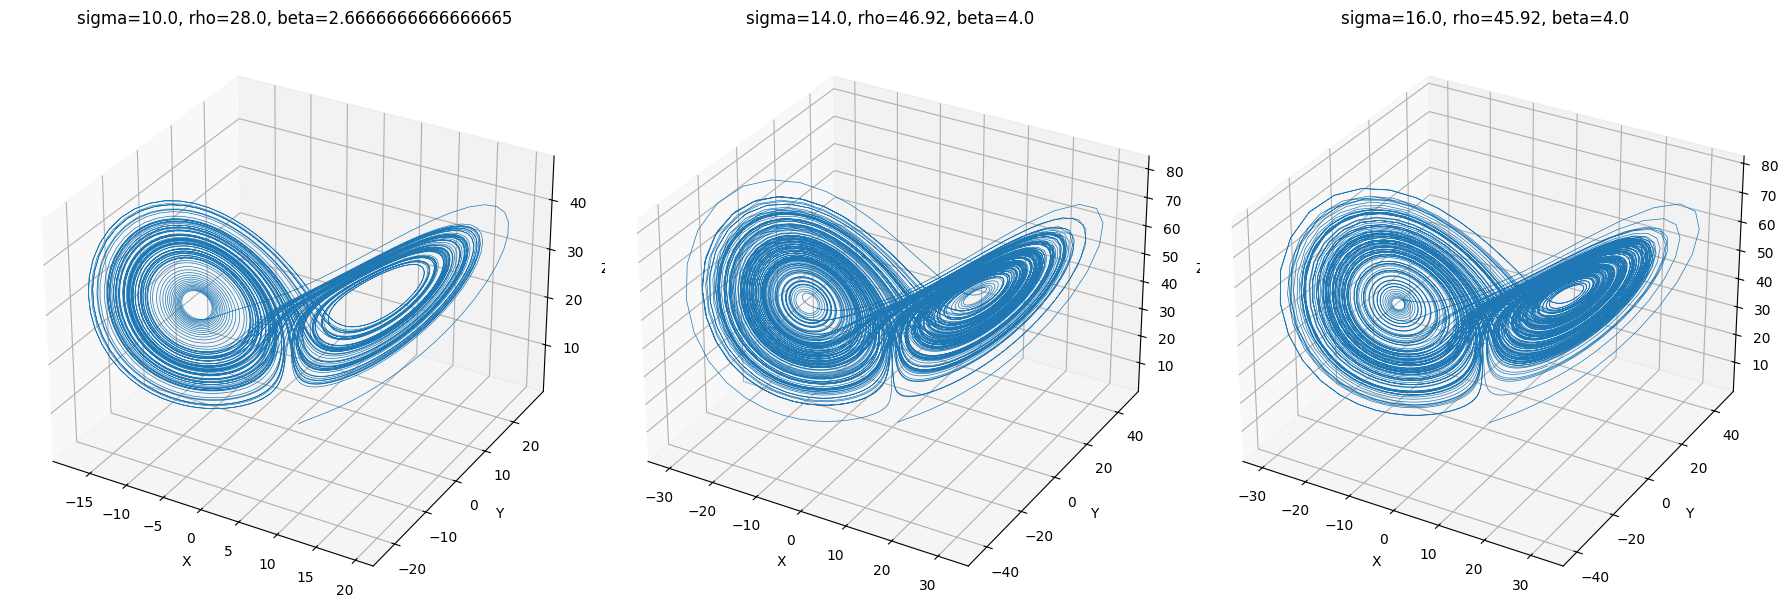

In [48]:
fig = plt.figure(figsize=(18, 6))

for i, data in enumerate(trajectories):
    ax = fig.add_subplot(1, 3, i + 1, projection='3d')
    trajectory = data["trajectory"]
    params = data["params"]
    ax.plot(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], lw=0.5)
    ax.set_title(f"sigma={params['sigma']}, rho={params['rho']}, beta={params['beta']}")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    
plt.tight_layout()
plt.show()

Перший набір параметрів є стандартний. Траєкторія зосереджується в двох областях, але безперервно змінює сторону, що є ознакою хаосу.

При другому наборі параметрів sigma = 14, rho = 46.92, beta=4, ми бачимо ширшу область траєкторії і більші амплітуди руху. При збільшені rho система стає більш хаотичною, за рахунок того, що збільшується амплітуда коливань. Більше значення beta збільшує відхилення у напрямку 
z координати.

При третьому наборі параметрів sigma = 16, rho = 45.92, beta=4 Порівняно з другим набором, цей атрактор схожий, але має трохи інші форми та менші амплітуди. Збільшення sigma  до 16 знижує хаотичність системи, порівняно з другим набором. Це призводить до менш виразної зміни напрямків у траєкторії. Схожі значення 
rho та  beta означають, що характер системи залишається нестабільним, але зміна sigma впливає на швидкість цих змін.

